<a href="https://colab.research.google.com/github/BrianDL/fisica_computacional/blob/main/2%20-%20Perihelio%20de%20Mercurio/simulacion_mercurio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulación de la Órbita de Mercurio

Este notebook contiene la implementación del método de Runge-Kutta de segundo orden (RK2) para simular la órbita de Mercurio y calcular la precesión de su perihelio.


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import math

def simular_orbita_mercurio(
        x_inicial:float = None,  ### hacemos esta configuración más abajo
        y_inicial:float = 0,
        vx_inicial:float = 0,
        vy_inicial:float = None, ### hacemos esta configuración más abajo
        iteraciones:int = 20000,
        delta_t: float = 0.0001,
        alpha: float = 0.0008
    ):

    ### Configurando los valores iniciales por defecto
    # Constantes
    #G = 6.67430e-11  # Constante gravitacional (m^3 kg^-1 s^-2)
    #M_s = 1.989e30   # Masa del Sol (kg)

    GM_s = 4 * np.pi**2
    a = 0.39
    e = 0.206

    # Inicializar variables
    x :float = x_inicial if x_inicial else (1+e)*a
    y :float = y_inicial
    vx:float = vx_inicial
    vy:float = vy_inicial if vy_inicial else np.sqrt( GM_s*(1-e)/( a*(1+e) ) )
    t :float = 0  # Tiempo inicial siempre igual cero

    # Listas para almacenar resultados
    tiempos = [t]
    posiciones = [(x, y)]
    velocidades = [(vx, vy)]

    # Bucle principal de la simulación
    for i in range(iteraciones):

        # Calcular variables radiales
        r = np.sqrt(x**2 + y**2)
        v = np.sqrt(vx**2 + vy**2)

        # Calcular los valores intermedios (k1)
        k1_x = delta_t * vx
        k1_y = delta_t * vy
        k1_vx = delta_t * (-GM_s * x / r**3) * (1 + alpha / r**2)
        k1_vy = delta_t * (-GM_s * y / r**3) * (1 + alpha / r**2)

        # Calcular los valores finales (k2)
        x_mid = x + k1_x/2.0
        y_mid = y + k1_y/2.0
        vx_mid = vx + k1_vx/2.0
        vy_mid = vy + k1_vy/2.0
        r_mid = np.sqrt(x_mid**2 + y_mid**2)

        k2_x = delta_t * vx_mid
        k2_y = delta_t * vy_mid
        k2_vx = delta_t * (-GM_s * x_mid / r_mid**3) * (1 + alpha / r_mid**2)
        k2_vy = delta_t * (-GM_s * y_mid / r_mid**3) * (1 + alpha / r_mid**2)

        # Actualizar los valores para el siguiente paso
        x += round(k2_x,10)
        y += round(k2_y,10)
        vx += round(k2_vx,10)
        vy += round(k2_vy,10)
        t += delta_t

        # Guardar los resultados en cada paso
        tiempos.append(t)
        posiciones.append((x, y))
        velocidades.append((vx, vy))

    return tiempos, posiciones, velocidades

Esta función `simular_orbita_mercurio` implementa el método RK2 para simular la órbita de Mercurio. En las siguientes celdas, añadiremos código para ejecutar la simulación, visualizar los resultados y calcular la precesión del perihelio.

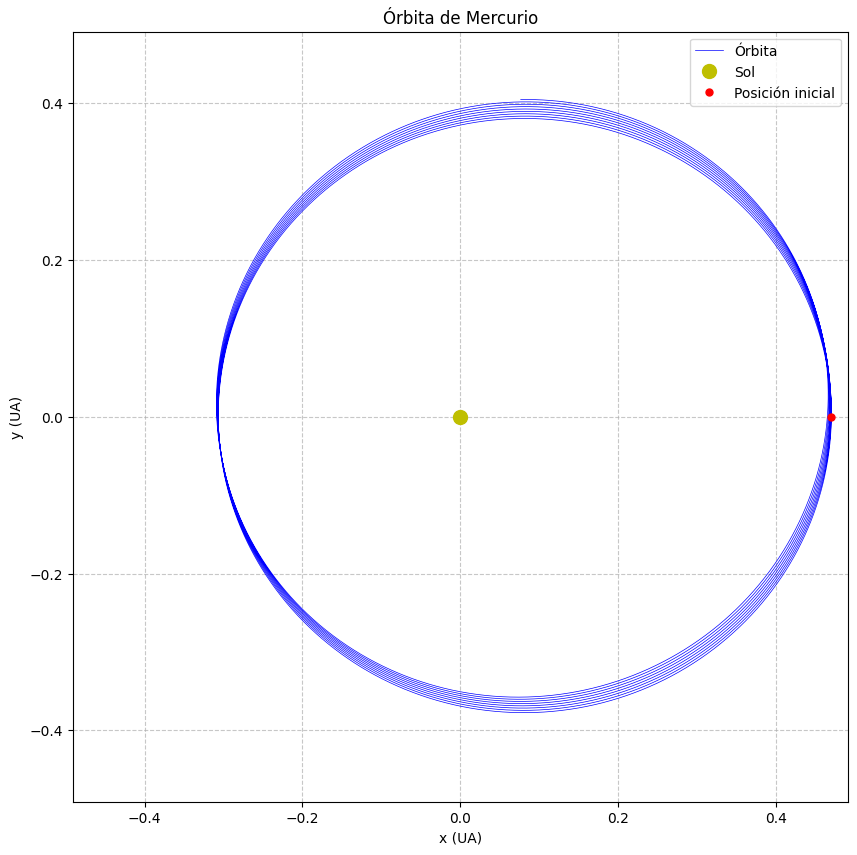

In [5]:

def plot_orbita(posiciones, titulo="Órbita de Mercurio"):
    # Extraer las coordenadas x e y de las posiciones
    x = [pos[0] for pos in posiciones]
    y = [pos[1] for pos in posiciones]

    # Crear la figura y los ejes
    fig, ax = plt.subplots(figsize=(10, 10))

    # Plotear la órbita
    ax.plot(x, y, 'b-', linewidth=0.5, label='Órbita')

    # Plotear el Sol
    ax.plot(0, 0, 'yo', markersize=10, label='Sol')

    # Plotear la posición inicial de Mercurio
    ax.plot(x[0], y[0], 'ro', markersize=5, label='Posición inicial')

    # Configurar los límites de los ejes
    max_range = max(max(x) - min(x) -0.2, max(y) - min(y) +0.2)
    ax.set_xlim(-(max_range/2), max_range/2)
    ax.set_ylim(-(max_range/2), max_range/2)

    # Configurar etiquetas y título
    ax.set_xlabel('x (UA)')
    ax.set_ylabel('y (UA)')
    ax.set_title(titulo)

    # Añadir leyenda
    ax.legend()

    # Añadir una cuadrícula
    ax.grid(True, linestyle='--', alpha=0.7)

    # Hacer que los ejes sean iguales para mantener la forma circular
    # ax.set_aspect('equal', 'box')

    # Mostrar el gráfico
    plt.show()

# Ejemplo de uso:
# Primero, ejecutamos la simulación
tiempos, posiciones, velocidades = simular_orbita_mercurio(alpha= 0.0008)


#print("Tiempos", tiempos)
#print("posiciones", posiciones)
#print("velocidades", velocidades)

# Luego, ploteamos la órbita
plot_orbita(posiciones)

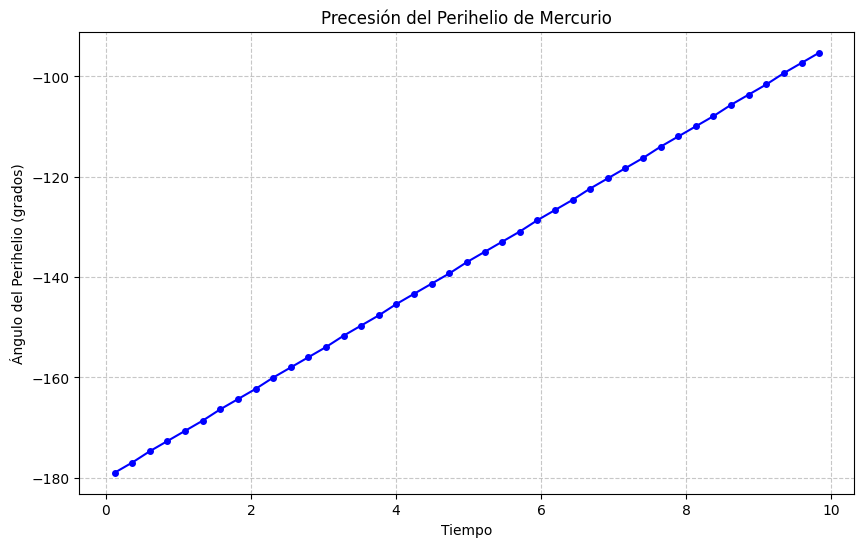

Tasa de precesión: 8.617539 grados por unidad de tiempo


In [20]:

def plot_precesion_perihelio(tiempos, posiciones, titulo="Precesión del Perihelio de Mercurio"):
    perihelios = []
    tiempos_perihelio = []

    distancias = [ math.sqrt( x**2 + y**2 ) for x, y in posiciones ]

    # Encontrar los perihelios
    for i in range(1, len(distancias) - 1):
        r_prev = distancias[i-1]
        r_curr = distancias[i]
        r_next = distancias[i +1]

        if r_curr < r_prev and r_curr < r_next:
            perihelios.append(posiciones[i])
            tiempos_perihelio.append(tiempos[i])

    # Calcular los ángulos de los perihelios
    angulos = [math.atan2(p[1], p[0]) for p in perihelios]

    # Convertir ángulos a grados
    angulos_grados = [math.degrees(a) for a in angulos]

    for i in range(1, len(angulos_grados)):
        while angulos_grados[i-1] > angulos_grados[i]:
            angulos_grados[i] += 360

    # Crear la figura y los ejes
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plotear los ángulos de los perihelios vs tiempo
    ax.plot(tiempos_perihelio, angulos_grados, 'bo-', markersize=4)

    # Configurar etiquetas y título
    ax.set_xlabel('Tiempo')
    ax.set_ylabel('Ángulo del Perihelio (grados)')
    ax.set_title(titulo)

    # Añadir una cuadrícula
    ax.grid(True, linestyle='--', alpha=0.7)

    # Mostrar el gráfico
    plt.show()

    # Calcular y mostrar la tasa de precesión
    if len(angulos_grados) > 1:
        tiempo_total = tiempos_perihelio[-1] - tiempos_perihelio[0]
        precesion_total = angulos_grados[-1] - angulos_grados[0]
        tasa_precesion = precesion_total / tiempo_total
        print(f"Tasa de precesión: {tasa_precesion:.6f} grados por unidad de tiempo")

# Ejemplo de uso:
# Primero, ejecutamos la simulación
tiempos, posiciones, velocidades = simular_orbita_mercurio(alpha=0.0008, iteraciones=100000, delta_t=0.0001)

# Luego, ploteamos la precesión del perihelio
plot_precesion_perihelio(tiempos, posiciones)

In [6]:
def calcular_precesion(tiempos, posiciones):
    perihelios = []
    tiempos_perihelio = []

    # Encontrar los perihelios
    for i in range(1, len(posiciones) - 1):
        r_prev = math.sqrt(posiciones[i-1][0]**2 + posiciones[i-1][1]**2)
        r_curr = math.sqrt(posiciones[i][0]**2 + posiciones[i][1]**2)
        r_next = math.sqrt(posiciones[i+1][0]**2 + posiciones[i+1][1]**2)

        if r_curr < r_prev and r_curr < r_next:
            perihelios.append(posiciones[i])
            tiempos_perihelio.append(tiempos[i])

    # Calcular los ángulos de los perihelios
    angulos = [math.atan2(p[1], p[0]) for p in perihelios]

    # Convertir ángulos a grados
    angulos_grados = [math.degrees(a) for a in angulos]

    for i in range(1, len(angulos_grados)):
        while angulos_grados[i-1] > angulos_grados[i]:
            angulos_grados[i] += 360

    # Calcular y mostrar la tasa de precesión
    tiempo_total = tiempos_perihelio[-1] - tiempos_perihelio[0]
    precesion_total = angulos_grados[-1] - angulos_grados[0]
    tasa_precesion = precesion_total / tiempo_total
    return tasa_precesion


Precesión para α=0.0008: 8.629706293438627
Precesión para α=0.001: 10.787814923871478
Precesión para α=0.002: 22.095472730274626
Precesión para α=0.004: 46.448182512358386


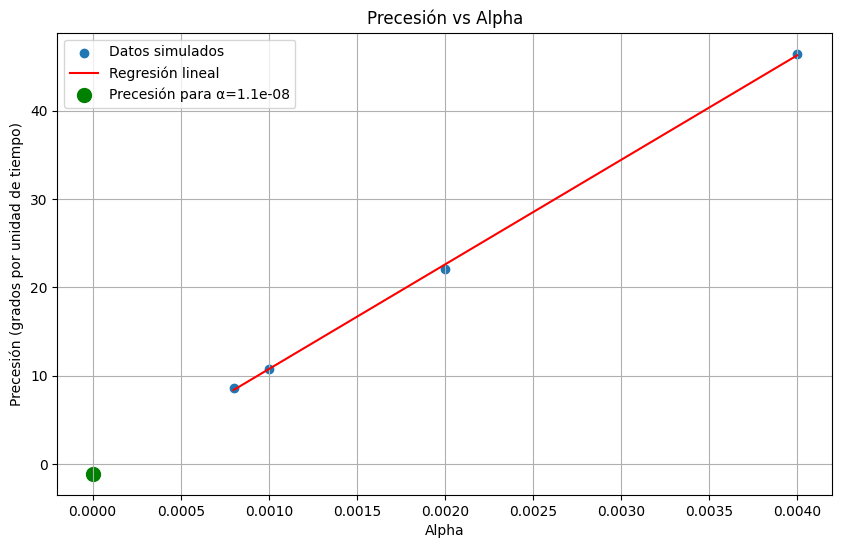

Precesión estimada para α=1.1e-08: -1.103569 grados por unidad de tiempo
Ecuación de la regresión lineal: y = 11843.073308x + -1.103699


In [17]:
def calcular_alpha(alphas, alpha_objetivo):
    precesiones = []

    for alpha in alphas:
        tiempos, posiciones, _ = simular_orbita_mercurio(alpha=alpha)
        precesion = calcular_precesion(tiempos, posiciones)
        precesiones.append(precesion)

        print(f"Precesión para α={alpha}: {precesion}")

    # Calcular la regresión lineal
    n = len(alphas)
    suma_x = sum(alphas)
    suma_y = sum(precesiones)
    suma_xy = sum(x*y for x, y in zip(alphas, precesiones))
    suma_x2 = sum(x*x for x in alphas)

    pendiente = (n * suma_xy - suma_x * suma_y) / (n * suma_x2 - suma_x * suma_x)
    interseccion = (suma_y - pendiente * suma_x) / n

    # Calcular la precesión para alpha_objetivo
    precesion_objetivo = pendiente * alpha_objetivo + interseccion

    # Crear el gráfico
    plt.figure(figsize=(10, 6))
    plt.scatter(alphas, precesiones, label='Datos simulados')
    plt.plot(alphas, [pendiente * x + interseccion for x in alphas], color='red', label='Regresión lineal')
    plt.scatter([alpha_objetivo], [precesion_objetivo], color='green', s=100, label=f'Precesión para α={alpha_objetivo}')

    plt.xlabel('Alpha')
    plt.ylabel('Precesión (grados por unidad de tiempo)')
    plt.title('Precesión vs Alpha')
    plt.legend()
    plt.grid(True)

    plt.show()

    print(f"Precesión estimada para α={alpha_objetivo}: {precesion_objetivo:.6f} grados por unidad de tiempo")
    print(f"Ecuación de la regresión lineal: y = {pendiente:.6f}x + {interseccion:.6f}")

# Ejemplo de uso:
alphas = [0.0008, 0.001, 0.002, 0.004]
alpha_objetivo = 0.000000011
calcular_alpha(alphas, alpha_objetivo)